# делаем файл без выбросов


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt
file_path = 'tab1-zpl_09-2023.xlsx'
sheet_name = 'мой лист'
columns_to_read = ['x3', 'x4', 'x2', 'y','x1']
df = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1, usecols=columns_to_read)
X = df[['x3', 'x4', 'x2','x1']]
X = sm.add_constant(X)  
y = df['y']
model = sm.OLS(y, X)
results = model.fit()
standardized_residuals = results.get_influence().resid_studentized_internal
outlier_threshold = 2
outliers_index = np.where(np.abs(standardized_residuals) > outlier_threshold)[0]
df_no_outliers = df.drop(outliers_index)
print("\nДанные без выбросов:")
print(df_no_outliers)
new_file_path = 'file_no_outliers.xlsx'
df_no_outliers.to_excel(new_file_path, index=False)
print(f'\nДанные без выбросов сохранены в файл: {new_file_path}')

Индексы выбросов: [179 191 204 216 217 263 275 287 292 293 294 295 296 297 298 299]

Данные без выбросов:
         y       x3     x4     x2      x1
0      988   6.0260  14.23  10.13  101.51
1     1000   6.0720  14.14   9.43  100.89
2     1059   6.1060  14.06   8.57  100.64
3     1040   6.1330  13.98   7.95  100.38
4     1047   6.1640  13.72   7.48  100.50
..     ...      ...    ...    ...     ...
286  55639  74.9818  51.81   8.40  100.96
288  55717  77.8174  51.35   8.74  100.99
289  57344  83.5485  51.37   9.16  101.17
290  66757  84.0851  52.19  16.70  107.61
291  62269  71.0237  53.11  17.83  101.56

[284 rows x 5 columns]

Данные без выбросов сохранены в файл: file_no_outliers.xlsx


# показываем теперь выбросы

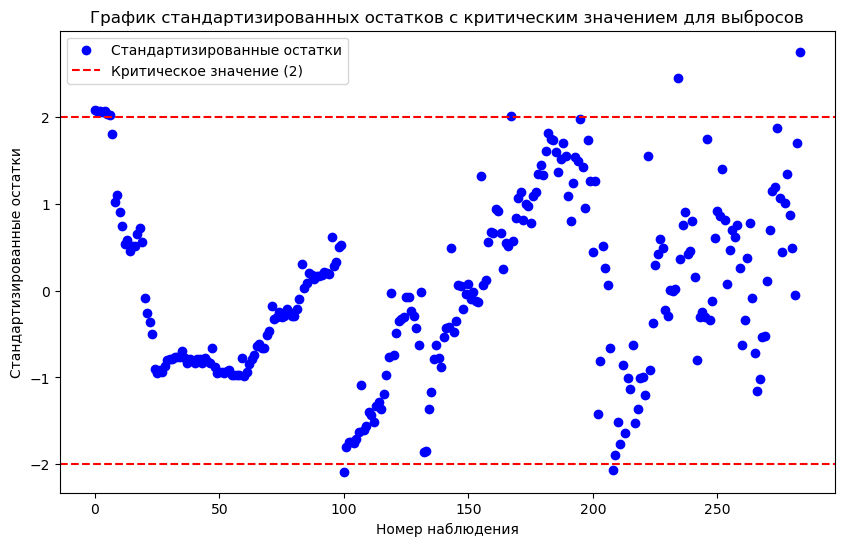

Индексы выбросов: [  0   1   2   3   4   5   6 100 167 208 234 283]

Данные без выбросов:
         y       x3     x4     x2
7     1052   7.9050  14.40   9.62
8     1112  16.0645  14.68  52.21
9     1123  16.0100  14.68  58.85
10    1164  17.8800  15.11  66.84
11    1482  20.6500  14.84  84.44
..     ...      ...    ...    ...
278  54649  70.5200  51.74   8.14
279  55639  74.9818  51.81   8.40
280  55717  77.8174  51.35   8.74
281  57344  83.5485  51.37   9.16
282  66757  84.0851  52.19  16.70

[272 rows x 4 columns]

Данные без выбросов сохранены в файл: file_no_outliers.xlsx


In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
file_path = 'мой файл.xlsx'
sheet_name = 'Sheet1'
columns_to_read = ['x3', 'x4', 'x2', 'y']
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=columns_to_read)
X = df[['x3', 'x4', 'x2']]
X = sm.add_constant(X) 
y = df['y']
model = sm.OLS(y, X)
results = model.fit()
standardized_residuals = results.get_influence().resid_studentized_internal
outlier_threshold = 2
plt.figure(figsize=(10, 6))
plt.scatter(range(len(standardized_residuals)), standardized_residuals, c='blue', label='Стандартизированные остатки')
plt.axhline(y=outlier_threshold, color='red', linestyle='--', label=f'Критическое значение ({outlier_threshold})')
plt.axhline(y=-outlier_threshold, color='red', linestyle='--')
plt.title('График стандартизированных остатков с критическим значением для выбросов')
plt.xlabel('Номер наблюдения')
plt.ylabel('Стандартизированные остатки')
plt.legend()
plt.show()

outliers_index = np.where(np.abs(standardized_residuals) > outlier_threshold)[0]

print("Индексы выбросов:", outliers_index)

df_no_outliers = df.drop(outliers_index)

print("\nДанные без выбросов:")
print(df_no_outliers)

new_file_path = 'file_no_outliers.xlsx'
df_no_outliers.to_excel(new_file_path, index=False)

print(f'\nДанные без выбросов сохранены в файл: {new_file_path}')


# Малое количество выбросов на графике стандартизированных остатков может говорить о том, что модель довольно хорошо объясняет данные и остатки в основном распределены равномерно вокруг нуля. В таком случае, выбросы будут теми точками, которые значительно отклоняются от среднего уровня остатков.

# Если график показывает, что большинство стандартизированных остатков находятся в пределах критического значения (например, между -2 и 2), то это может свидетельствовать о том, что модель достаточно хорошо соответствует данным, и выбросы не сильно влияют на результаты регрессии.

# Важно помнить, что интерпретация выбросов может зависеть от конкретной задачи и контекста данных. Иногда выбросы могут быть результатом ошибок в данных, экстремальных событий или наличия дополнительных факторов, которые не были учтены в модели. Также возможно, что выбросы представляют интерес и могут быть объектом дополнительного анализа.

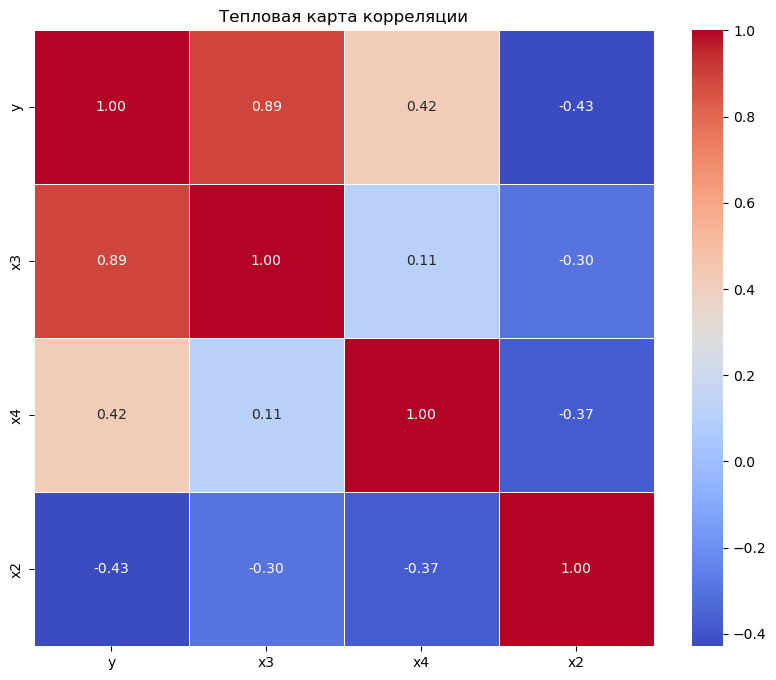

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляции')
plt.show()
